# Google Colal 데이터 로드

In [1]:
#Step 1. 구글 코랩에 한글 폰트 설정하기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [ ]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
src_data = pd.read_csv(io.BytesIO(myfile['수박과참외.csv']),
                       encoding='cp949')
src_data

# 로컬 데이터 로드

In [4]:
#컴퓨터에서 작업하려면 아래 코드의 주석을 제거하고 실행하면 됩니다
import pandas as pd

src_data = pd.read_csv('../머신러닝실습용자료/수박과참외.csv',encoding='cp949')
src_data

,종류,무게,길이
0,수박,2000,30.0
1,수박,2500,25.0
2,수박,1800,20.0
3,수박,1500,16.0
4,수박,900,10.0
5,수박,2500,33.0
6,수박,2250,23.0
7,수박,1860,17.0
8,수박,2100,21.0
9,수박,1500,17.0


# 공통 실습 코드

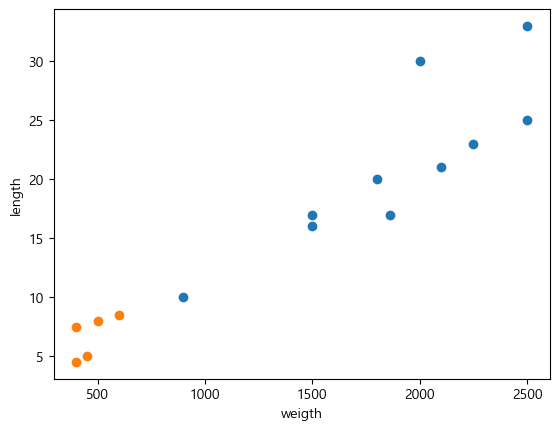

In [8]:
#수박과 참외의 무게와 길이
수박정보 = src_data.loc[ (src_data['종류'] =='수박'), ['무게','길이']]
참외정보 = src_data.loc[ (src_data['종류'] =='참외'), ['무게','길이']]

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = 'C:/Windows/Fonts/malgun.ttf'

font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font' , family=font_name)
plt.scatter(수박정보.무게,수박정보.길이)
plt.scatter(참외정보.무게,참외정보.길이)
plt.xlabel('weigth')
plt.ylabel('length')
plt.show()

In [11]:
import numpy as np

# np.column_stack을 통해 무게와 길이를 data 변수에 넣는다. 
data = np.column_stack([src_data['무게'], src_data['길이']])

# 데이터의 종류를 target에 넣는다.
target = src_data['종류']

In [12]:
data

array([[2000. ,   30. ],
       [2500. ,   25. ],
       [1800. ,   20. ],
       [1500. ,   16. ],
       [ 900. ,   10. ],
       [2500. ,   33. ],
       [2250. ,   23. ],
       [1860. ,   17. ],
       [2100. ,   21. ],
       [1500. ,   17. ],
       [ 500. ,    8. ],
       [ 400. ,    7.5],
       [ 450. ,    5. ],
       [ 400. ,    4.5],
       [ 600. ,    8.5]])

In [22]:
# Step 4. 주어진 데이터를 훈련용과 테스트(검증용)으로 나눕니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target,test_size=0.2)

In [15]:
# 데이터 구조(shape) 확인
X_train

array([[ 500. ,    8. ],
       [ 900. ,   10. ],
       [ 450. ,    5. ],
       [ 600. ,    8.5],
       [2250. ,   23. ],
       [ 400. ,    4.5],
       [2500. ,   33. ],
       [2500. ,   25. ],
       [ 400. ,    7.5],
       [1800. ,   20. ],
       [1500. ,   17. ],
       [1860. ,   17. ]])

In [31]:
# Step 5. 분석하여 모델을 생성합니다.
from sklearn.neighbors import KNeighborsClassifier
# knn 모델 생성
knn = KNeighborsClassifier()

# 모델 학습
knn.fit(X_train,y_train)

# 모델 평가
knn.score(data,target)

0.9333333333333333

In [24]:
# Step 6. 모델이 정확한지 임의의 데이터로 테스트합니다.
print( knn.predict(X_test))

['참외' '수박' '수박']


In [ ]:
# Step 7. 위 데이터의 값을 그래프로 출력하여 확인합니다.
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = 'C:\Windows\Fonts\malgun.ttf'

font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font' , family=font_name)

plt.scatter(훈련용_data[:,0], 훈련용_data[:,1])
plt.scatter(1000, 15, marker='o')
plt.xlabel('무게')
plt.ylabel('길이')12
plt.show()

In [ ]:
# Step 8. 최적의 k 값 찾기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

k_list = range(1,12)
accuracies = []

for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(훈련용_data, 훈련용_target.values.ravel())
  accuracies.append(classifier.score(테스트용_data, 테스트용_target))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("최적의 이웃 값 찾기")
plt.show()

In [ ]:
# 최적의 K 값 가지고 실행